In [501]:
#Programming_project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

<h3><b>Data Acquisition</b></h3>

In [502]:
# Data acquisition
NY_dataset = pd.read_csv("C:\\Users\\alesi\\Desktop\\Programming\\Programming_project\\AB_NYC_2019.csv")

# First 5 rows of the DataFrame
NY_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [503]:
print('The number of rows is:', NY_dataset.shape[0])
print('The number of columns is:', NY_dataset.shape[1])

The number of rows is: 48895
The number of columns is: 16


Before we perform any analysis, we'll first see what our dataset looks like. These are the variables it contains:

- id: - id number that identifies the property
- name: - Property name
- host_id: - id number that identifies the host
- host_name: - Host name
- neighbourhood_group: - The main regions of the city
- neighbourhood: - The neighbourhoods
- latitude: - Property latitude
- longitude: - Property longitude
- room_type: - Type of the room
- price: - The price for one night
- minimum_nights: - Minimum amount of nights to book the place
- number_of_reviews: - Number of reviews received
- last_review: - Date of the last review
- reviews_per_month: - Amount of reviews per month
- calculated_host_listings_count: - Number of properties available on Airbnb owned by the host
- availability_365: - Number of days of availability within 365 days

In [504]:
pd.set_option('display.float_format', '{:.3f}'.format)
NY_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.000,19017143.236,10983108.386,2539.000,9471945.000,19677284.000,29152178.500,36487245.000
host_id,48895.000,67620010.647,78610967.033,2438.000,7822033.000,30793816.000,107434423.000,274321313.000
latitude,48895.000,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.000,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.000,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.000,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.000,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,38843.000,1.373,1.680,0.010,0.190,0.720,2.020,58.500
calculated_host_listings_count,48895.000,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.000,112.781,131.622,0.000,0.000,45.000,227.000,365.000


In [505]:
NY_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that the DataFrame has 48'895 rows and 16 columns.

<h3><b>Data Cleaning</b></h3>

In [506]:
# Checking the presence of missing values
NY_dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that there are 4 columns with missing values, but columns "name" and "host_name" and "last_review" are irrelevant to our data analysis and column "review_per_month" needs very simple handling.

We delete "name", "host_name" and "last_review" because are irrelevant in our analysis.

In [507]:
NY_dataset.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)


The 'reviews_per_month' column provides insights into the average count of reviews on a monthly basis, a missing value means the item has 0 reviews per month.

In [508]:
NY_dataset.fillna({'reviews_per_month': 0}, inplace=True)

In [509]:
# Checking if we have deleted all the missing data
NY_dataset.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [510]:
NY_dataset.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,0.210,6,365
1,2595,2845,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,0.380,2,355
2,3647,4632,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,0.000,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,4.640,1,194
4,5022,7192,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,0.100,1,0


In [511]:
print('The number of rows is:', NY_dataset.shape[0])
print('The number of columns is:', NY_dataset.shape[1])

The number of rows is: 48895
The number of columns is: 13


<h4><b>Outliers</b></h4>

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'latitude'}>],
       [<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>],
       [<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'reviews_per_month'}>,
        <AxesSubplot: title={'center': 'calculated_host_listings_count'}>],
       [<AxesSubplot: title={'center': 'availability_365'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

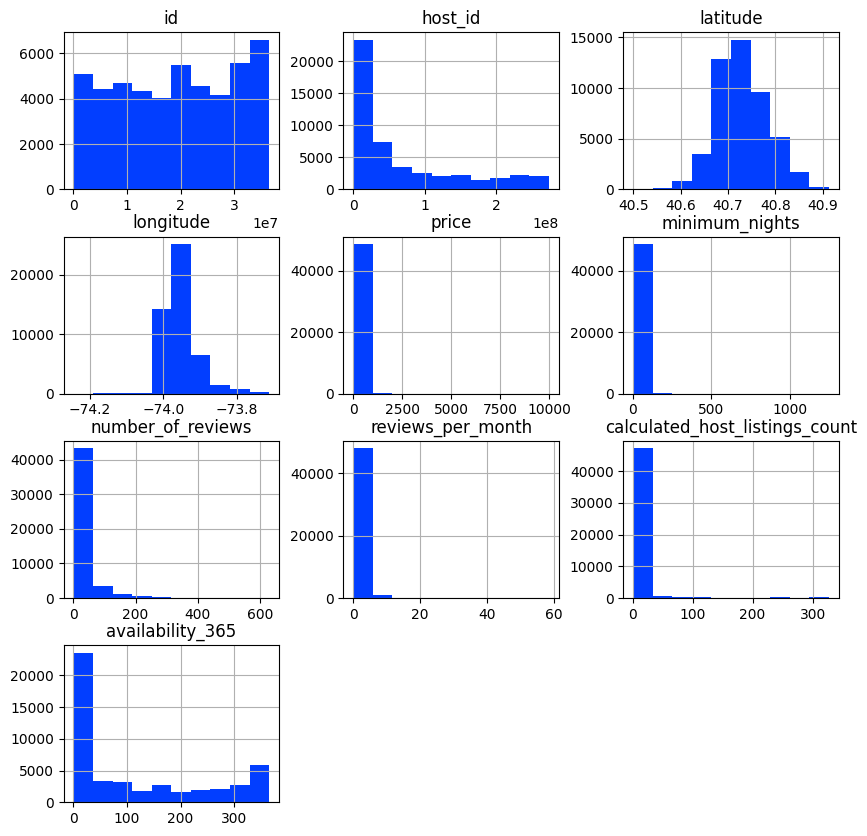

In [512]:
NY_dataset.hist(figsize=(10,10))

In [513]:
NY_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.000,19017143.236,10983108.386,2539.000,9471945.000,19677284.000,29152178.500,36487245.000
host_id,48895.000,67620010.647,78610967.033,2438.000,7822033.000,30793816.000,107434423.000,274321313.000
latitude,48895.000,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.000,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.000,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.000,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.000,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,48895.000,1.091,1.597,0.000,0.040,0.370,1.580,58.500
calculated_host_listings_count,48895.000,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.000,112.781,131.622,0.000,0.000,45.000,227.000,365.000


Looking at this table and the histograms above, we can see that there are data points that are significantly different from other points in the dataset.
Here are some observations:
- 'price': The dataset shows an unusual distribution in terms of price values. On one end, there are instances with a minimum price of 0, which is unexpected. On the other end, some listings have prices as high as 10'000 those are significantly above the 75th percentile. This wide price range contributes to a notable standard deviation.

- 'minimum_nights': An interesting observation is the presence of high values for the 'minimum_nights' column. There is a maximum of 1'250 nights that is significantly above the 75th percentile.

- 'number_of_reviews': While most listings seem to have a moderate number of reviews, there are a few with exceptionally high counts, reaching as high as 629 reviews. This number is significantly above the 75th percentile, indicating the existence of potential outliers.

- 'reviews_per_month': There are instances where the value reaches as high as 58.5 reviews per month. This is significantly above the 75th percentile, suggesting the likelihood of outliers.

- 'calculated_host_listings_count': The 'calculated_host_listings_count' column also shows indications of outliers. While most hosts have a reasonable number of listings, there are instances where the count goes as high as 327 listings. This value is significantly above the 75th percentile.

Now we are going to use the Z-score to identify and then remove outliers.

In [514]:
# Select columns
NY_dataset_col = NY_dataset[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count' ]]

for col in NY_dataset_col:
    # Calculate z-score of the columns
    z_score = np.abs(stats.zscore(NY_dataset[col]))
    outliers_num = len(np.where(z_score > 2)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

price: 767
minimum_nights: 467
number_of_reviews: 2496
reviews_per_month: 2494
calculated_host_listings_count: 1153


In [515]:
# Remove outliers outside 2 standard deviations from the mean (around 5%)
z_scores = np.abs(stats.zscore(NY_dataset_col))

# DataFrame without outliers
NY_dataset_wo = NY_dataset[(z_scores < 2).all(axis=1)]
NY_dataset_wo.shape

(42307, 13)

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'latitude'}>],
       [<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>],
       [<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'reviews_per_month'}>,
        <AxesSubplot: title={'center': 'calculated_host_listings_count'}>],
       [<AxesSubplot: title={'center': 'availability_365'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

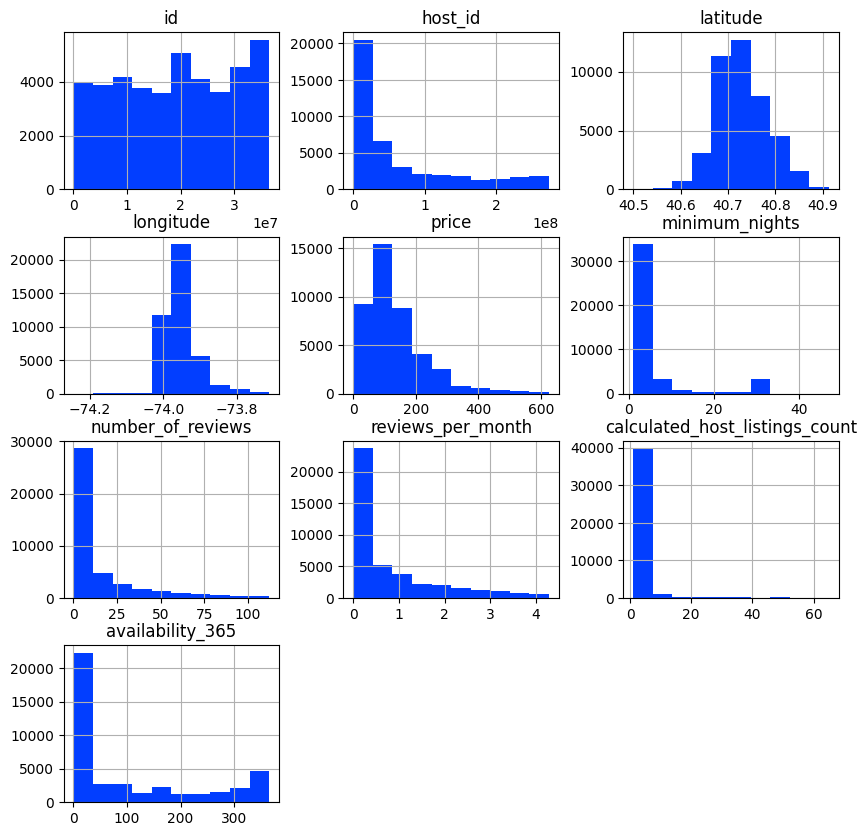

In [516]:
NY_dataset_wo.hist(figsize=(10,10))

In [517]:
NY_dataset_wo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42307.000,19065546.599,10786414.195,2539.000,9682880.000,19691525.000,28778296.500,36487245.000
host_id,42307.000,65849921.331,77497203.819,2438.000,7662669.000,29899972.000,103220478.500,274321313.000
latitude,42307.000,40.729,0.055,40.500,40.690,40.722,40.763,40.913
longitude,42307.000,-73.952,0.045,-74.244,-73.982,-73.955,-73.936,-73.713
price,42307.000,132.867,93.982,0.000,67.000,100.000,170.000,625.000
minimum_nights,42307.000,5.558,8.055,1.000,2.000,3.000,5.000,47.000
number_of_reviews,42307.000,14.536,22.514,0.000,1.000,4.000,18.000,112.000
reviews_per_month,42307.000,0.773,1.012,0.000,0.030,0.300,1.120,4.280
calculated_host_listings_count,42307.000,2.710,6.116,1.000,1.000,1.000,2.000,65.000
availability_365,42307.000,101.536,129.128,0.000,0.000,24.000,188.000,365.000


<h4><b>Correlation</b></h4>

In [518]:
#Get correlation between different numeric features
corr = NY_dataset_wo[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000,-0.001,-0.024,0.010,0.075
minimum_nights,-0.001,1.000,-0.115,0.404,0.223
number_of_reviews,-0.024,-0.115,1.000,-0.054,0.194
calculated_host_listings_count,0.010,0.404,-0.054,1.000,0.318
availability_365,0.075,0.223,0.194,0.318,1.000


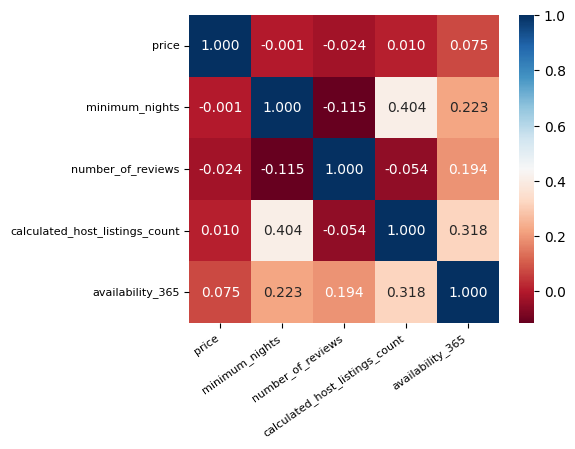

In [519]:
plt.figure(figsize=(5,4))
heatmap = sns.heatmap(corr, cmap='RdBu', fmt='.3f', annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.xticks(rotation=35, ha='right')
plt.show()

The variables do not seem to be significantly correlated to each other.

Entire home/apt    21365
Private room       19878
Shared room         1064
Name: room_type, dtype: int64




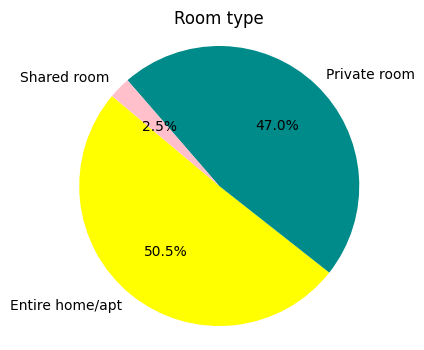

In [530]:
# Calculating the number of rooms for each room type
room_type = NY_dataset_wo['room_type'].value_counts()

# Displaying the results
print(room_type)
print('\n')

# Plotting the pie plot of room type
plt.figure(figsize=(5, 4))
plt.pie(room_type, labels = room_type.index, colors = ['yellow', 'darkcyan', 'pink'], autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Room type')
plt.show()

room_type
Entire home/apt   182.840
Private room       82.830
Shared room        64.230
Name: price, dtype: float64




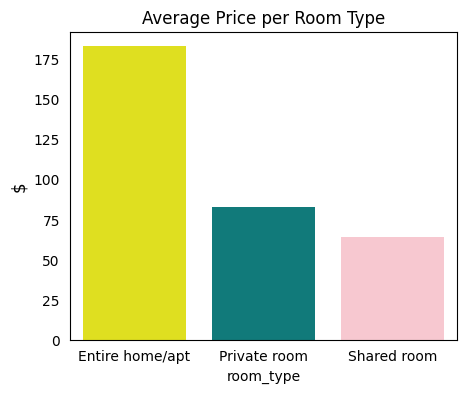

In [531]:
# Calculating the average price per room type
type_price = round(NY_dataset_wo.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(type_price)
print('\n')

# Plottingthe average price per room type
plt.figure(figsize=(5, 4))
ax = sns.barplot(x = type_price.index, y = type_price, palette = ['yellow', 'darkcyan', 'pink']) 
ax.set_title('Average Price per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('$', fontsize=12)
plt.show()

Manhattan        18085
Brooklyn         18084
Queens            4862
Bronx              955
Staten Island      321
Name: neighbourhood_group, dtype: int64




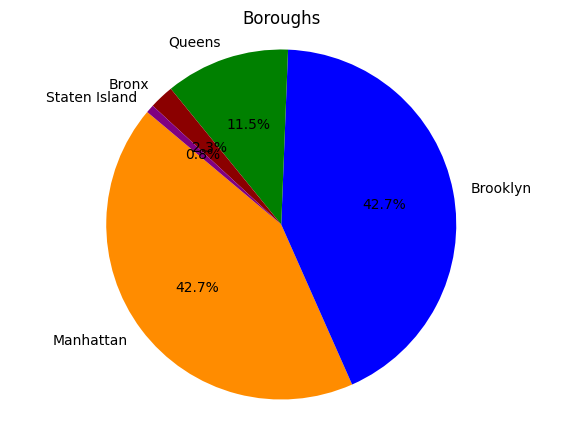

In [533]:
# Calculating the number of rooms for each room type
Boroughs = NY_dataset_wo['neighbourhood_group'].value_counts()

# Displaying the results
print(Boroughs)
print('\n')

# Plotting the pie plot of room type
plt.figure(figsize=(7, 5))
plt.pie(Boroughs, labels = Boroughs.index, colors = ['darkorange', 'blue', 'green', 'darkred', 'purple'], autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Boroughs')
plt.show()

neighbourhood_group
Manhattan       164.710
Brooklyn        114.300
Queens           95.720
Staten Island    94.800
Bronx            83.400
Name: price, dtype: float64




Text(0, 0.5, '$')

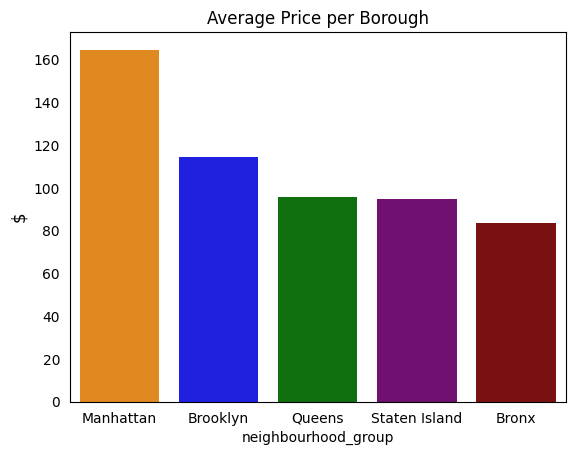

In [535]:
# Calculating the average price per region
price_boroughs = round(NY_dataset_wo.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_boroughs)
print('\n')

# Plotting the average price per region
ax = sns.barplot(x = price_boroughs.index, y = price_boroughs, palette=['darkorange', 'blue', 'green', 'purple', 'darkred', ]) 
ax.set_title('Average Price per Borough')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)

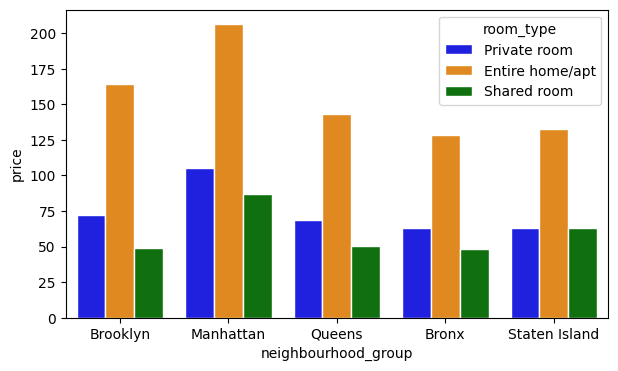

In [524]:
plt.figure(figsize=(7, 4))
sns.barplot(x=NY_dataset_wo.neighbourhood_group, y=NY_dataset_wo.price, hue=NY_dataset_wo.room_type, errorbar=None, edgecolor='white', palette = ['blue', 'darkorange', 'green'] )
plt.show()

As we can see, Manhattan is the most expensive neighbourhood and the price of entire home/apt is more than any other room type.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

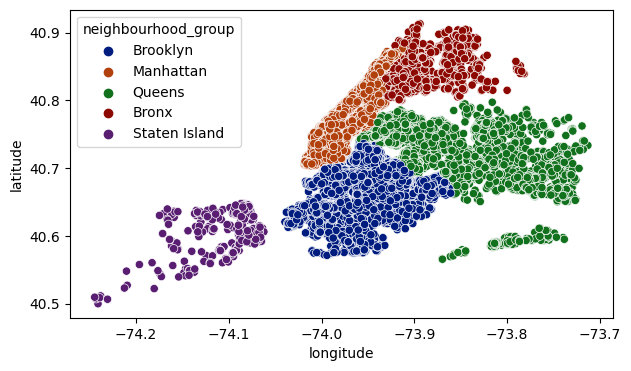

In [536]:
# Scatter plot to viusalize the locations of all the Airbnb
plt.figure(figsize=(7, 4))
sns.scatterplot(x=NY_dataset_wo.longitude,y=NY_dataset_wo.latitude,hue=NY_dataset_wo.neighbourhood_group, palette = 'dark')

With all these plots, the conclusions are:

- Entire home/apt and private room are the most common room types;
- Entire home/apt are usually more expensive than private and shared rooms;
- Over 85% of the rooms are located in Manhattan and Brooklyn, which are also the most expensive regions, especially Manhattan;